/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_48761/2347915812.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(vehiclesSumData['County'] , rotation = 45 , ha = 'right')


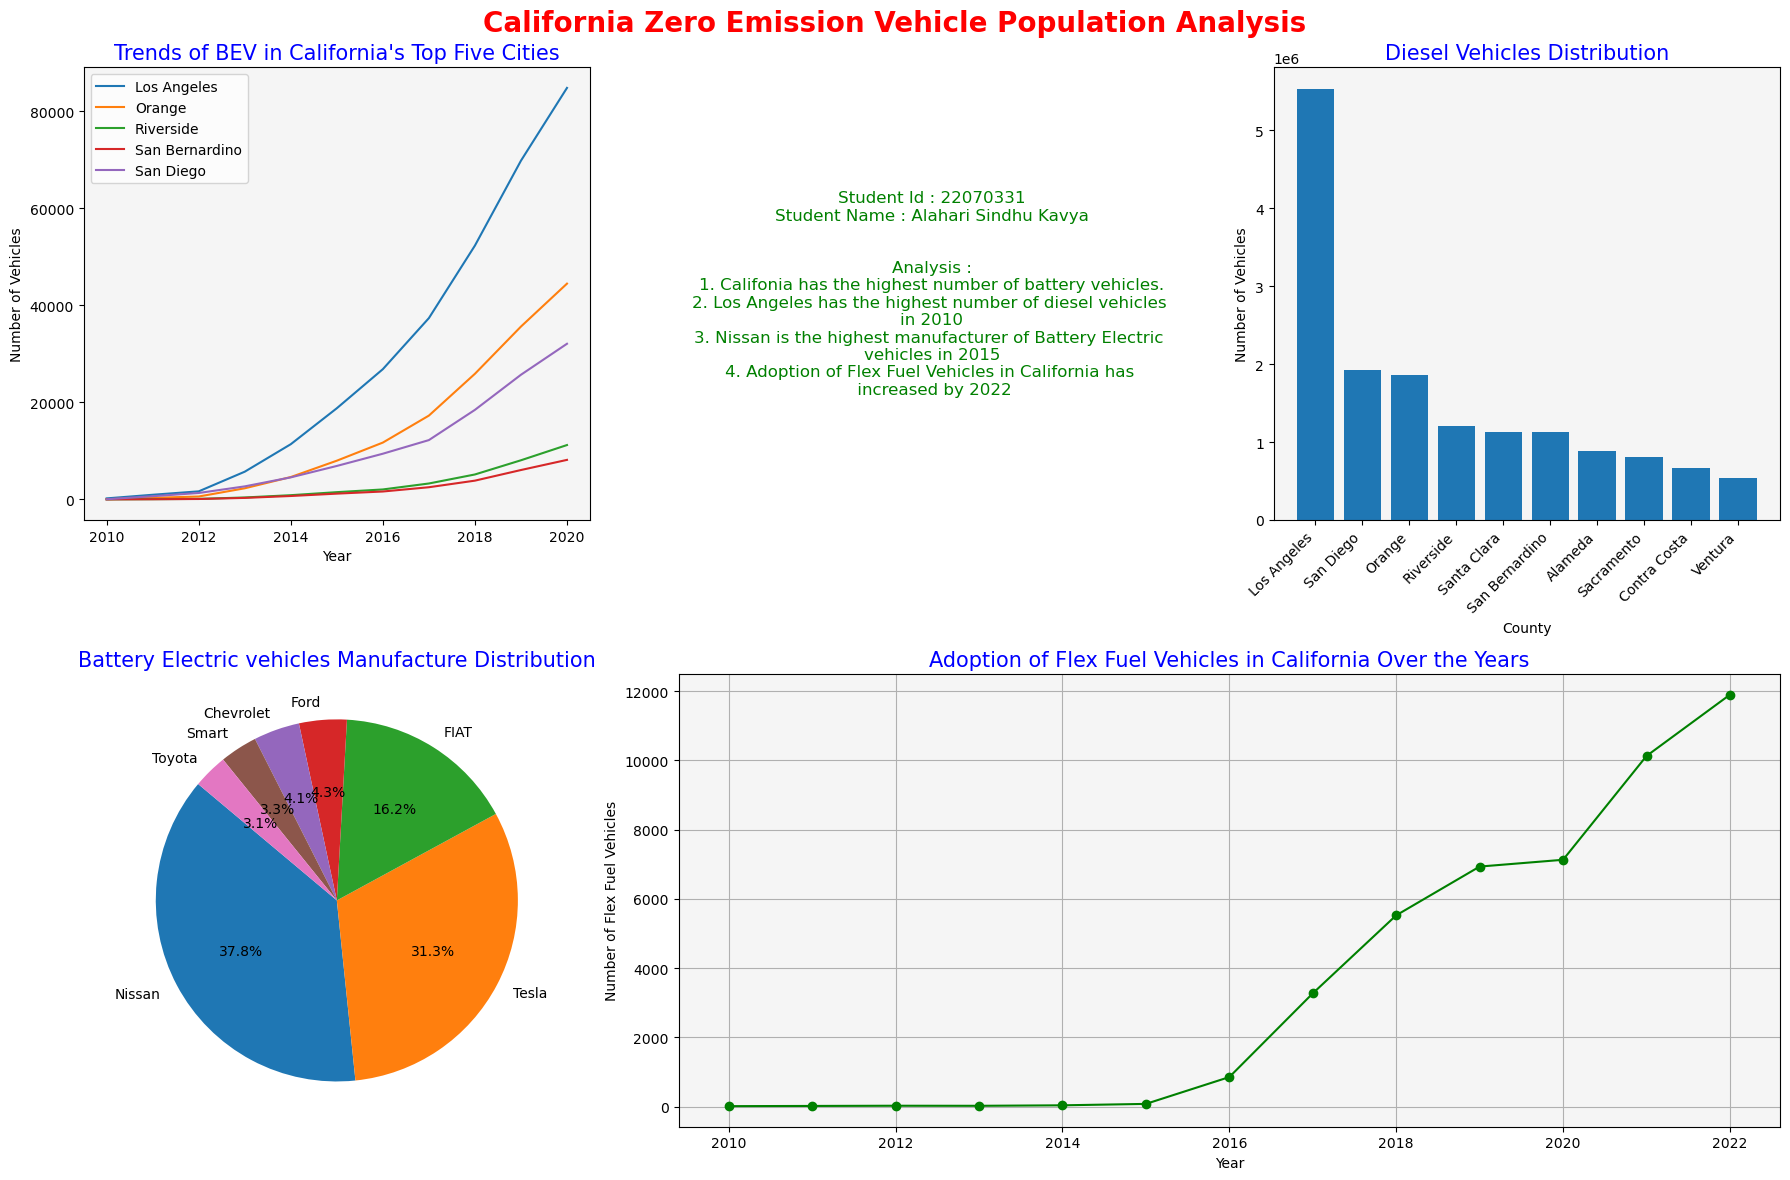

In [1]:
# Data Source Link :https://www.kaggle.com/code/natalyamatyushenko/zero-emissions-vehicles-zevs-population-in-ca/input
#GithubLink :https://github.com/SindhuKavyaAlahari/Energy-Commission-Zero-Emission-Vehicle-Population-in-California.git

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def readData(filename):
    data = pd.read_csv(filename)
    return data

data = readData(
    filename = 'Energy Commission Zero Emission Vehicle Population in California .csv')

# Create a 2x3 grid for the dashboard layout with a background color
fig = plt.figure(figsize = (18 , 12) , facecolor = 'white')
gs = GridSpec(2 , 3 , figure = fig)

fig.suptitle("California Zero Emission Vehicle Population Analysis" ,
             fontsize = 20 , fontweight = 'bold' , color = 'red')

# Plot 1: Trends of Battery Electric Vehicles
ax1 = fig.add_subplot(gs[0 , 0] , facecolor = '#f5f5f5')
filterData2010_to_22 = data[(data['Data Year'] >= 2010) &
                            (data['Data Year'] <= 2020)]
onlyBatteryVehicles = filterData2010_to_22[filterData2010_to_22['Fuel Type'] ==
                                           'Battery Electric (BEV)']
selectedCounties = ['Los Angeles' , 'Orange' , 'Riverside' , 'San Bernardino' , 'San Diego']

for county in selectedCounties:
    county_data = onlyBatteryVehicles[onlyBatteryVehicles['County'] == county]
    county_data = county_data.groupby('Data Year' , as_index = False)['Number of Vehicles'].sum()
    ax1.plot(county_data['Data Year'] ,
             county_data['Number of Vehicles'] ,
             label = county)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Vehicles')
ax1.set_title("Trends of BEV in California's Top Five Cities" ,
          color = 'blue' , fontsize = 15)
ax1.legend()

# Plot 2: Text Description
ax2 = fig.add_subplot(gs[0 , 1] , facecolor = '#f5f5f5')
description_text = (
    "Student Id : 22070331\n"
    "Student Name : Alahari Sindhu Kavya\n"
    "\n"
    "\n"
    "Analysis :\n"
    "1. Califonia has the highest number of battery vehicles.\n"
    "2. Los Angeles has the highest number of diesel vehicles \n"
    "in 2010\n"
    "3. Nissan is the highest manufacturer of Battery Electric \n"
    "vehicles in 2015\n"
    "4. Adoption of Flex Fuel Vehicles in California has \n"
    " increased by 2022"
)
ax2.text(0.5 , 0.5 , description_text , ha = 'center' , va = 'center' ,
         fontsize = 12 , color = 'green')
ax2.axis('off')  # Turn off axis for pure text description

# Plot 3: Diesel Vehicles in 2010
ax3 = fig.add_subplot(gs[0 , 2] , facecolor = '#f5f5f5')
filterData2010 = data[data['Data Year'] == 2010]
Dieselvehicles = filterData2010[filterData2010['Fuel Type'] == 'Diesel']
vehiclesSumData = filterData2010.groupby('County' , as_index = False)['Number of Vehicles']\
    .sum().nlargest(10 , 'Number of Vehicles')

ax3.bar(vehiclesSumData['County'] , vehiclesSumData['Number of Vehicles'])
ax3.set_title('Diesel Vehicles Distribution' , color = 'blue' , fontsize = 15)
ax3.set_xlabel('County')
ax3.set_ylabel('Number of Vehicles')
ax3.set_xticklabels(vehiclesSumData['County'] , rotation = 45 , ha = 'right')

# Plot 4: Pie chart for Battery Electric Vehicles in 2015
ax4 = fig.add_subplot(gs[1 , 0] , facecolor = '#f5f5f5')
filteredData2015 = data[data['Data Year'] == 2015]
Batteryvehicles = filteredData2015[filteredData2015['Fuel Type'] == 'Battery Electric (BEV)']
modelSum = Batteryvehicles.groupby('Manufacturer' , as_index = False)['Number of Vehicles'].\
    sum().nlargest(7 , 'Number of Vehicles')

ax4.pie(modelSum['Number of Vehicles'] , labels = modelSum['Manufacturer'] , autopct = '%1.1f%%' ,
        startangle = 140)
ax4.set_title('Battery Electric vehicles Manufacture Distribution' , color = 'blue' , fontsize = 15)

# Plot 5: Line graph for Flex Fuel Vehicles adoption over the years
ax5 = fig.add_subplot(gs[1 , 1:] , facecolor = '#f5f5f5')  # Same background color for the subplot
flex_fuel_data = data[data['Dashboard Fuel Type Group'] == 'Fuel Cell (FCEV)']
total_flex_fuel_per_year = flex_fuel_data.groupby('Data Year')['Number of Vehicles'].sum()

ax5.plot(total_flex_fuel_per_year.index , total_flex_fuel_per_year , marker = 'o' , color = 'green')
ax5.set_xlabel('Year')
ax5.set_ylabel('Number of Flex Fuel Vehicles')
ax5.set_title('Adoption of Flex Fuel Vehicles in California Over the Years' ,
              color = 'blue' , fontsize = 15)
ax5.grid(True)

# Adjust layout
plt.tight_layout()
# plt.savefig('22070331.png')
# Show the dashboard
plt.show()
